In [1]:
import pandas as pd
import yfinance as yf
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(15,15))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data.iloc[:,x], data.iloc[:,y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    # for i, j in zip(range(numdata), itertools.cycle((-1, 0))):
    #     print(i, j)
    #     axes[j,i].xaxis.set_visible(True)
    #     axes[i,j].yaxis.set_visible(True)

    return fig   

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

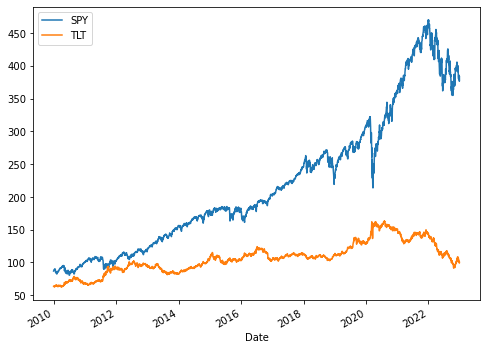

In [3]:
tickers_list = ['SPY', 'TLT']
df = yf.download(tickers_list,start='2010-01-01',end='2022-12-30')['Adj Close']
df.plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

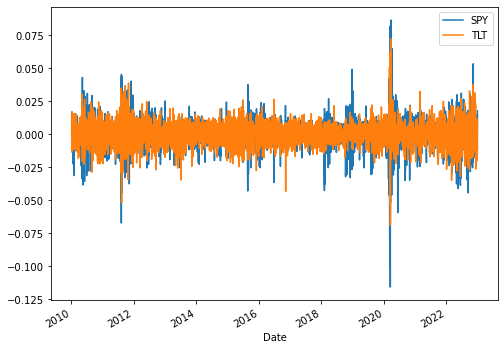

In [4]:
daily_returns_df =np.log(df/df.shift(1)).dropna()
daily_returns_df.plot(figsize=(8,6))

In [5]:
mvnorm = st.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
x = mvnorm.rvs(10000)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


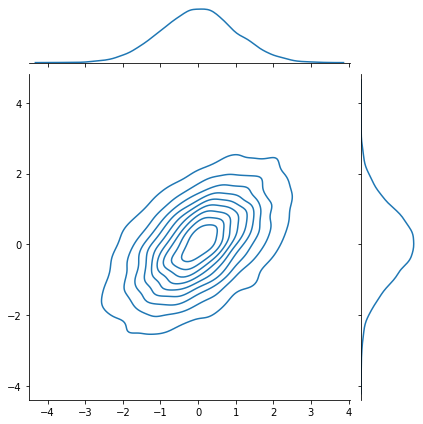

In [6]:
sns.jointplot(x[:, 0], x[:, 1], kind='kde')


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


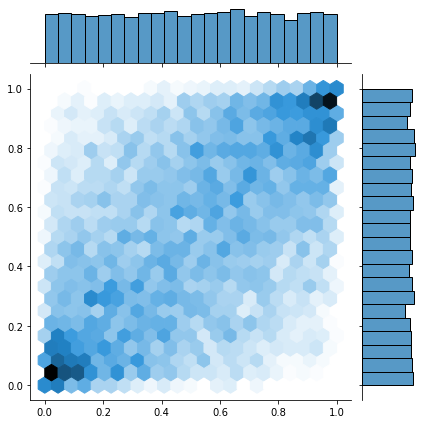

In [7]:
x_unif = st.norm.cdf(x)
sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

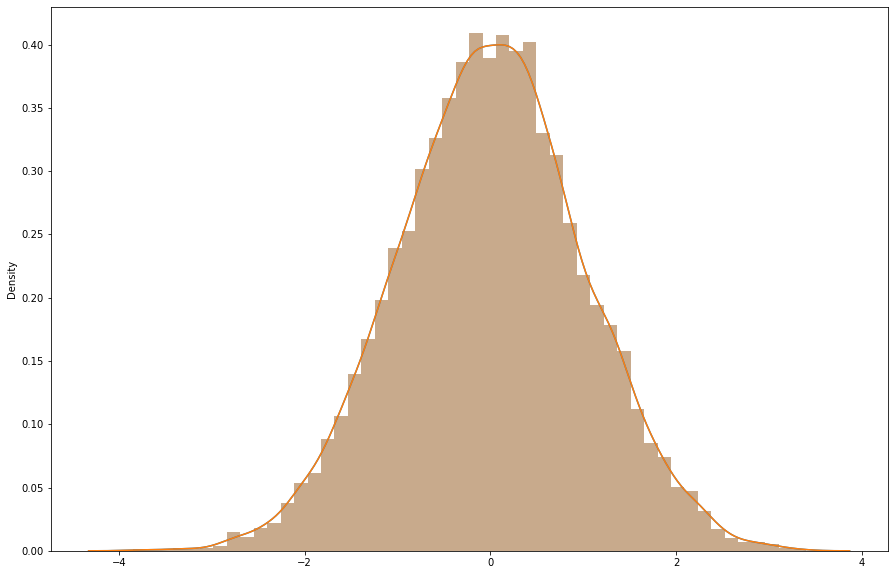

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.norm.ppf(x_unif[:,0]), ax=ax)
sns.distplot(x[:, 0], ax=ax)

In [9]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()
copula.fit(x)

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


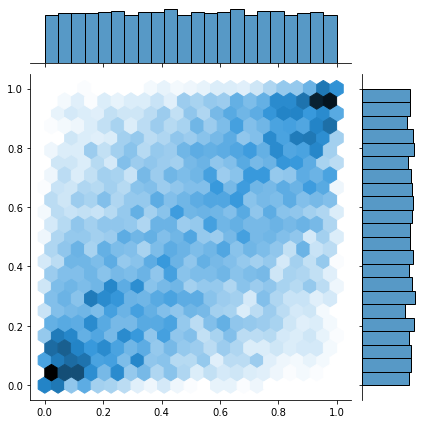

In [10]:
x1 = copula.univariates[0].cdf(x[:,0])
x2 = copula.univariates[1].cdf(x[:,1])
sns.jointplot(x1, x2, kind='hex')

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

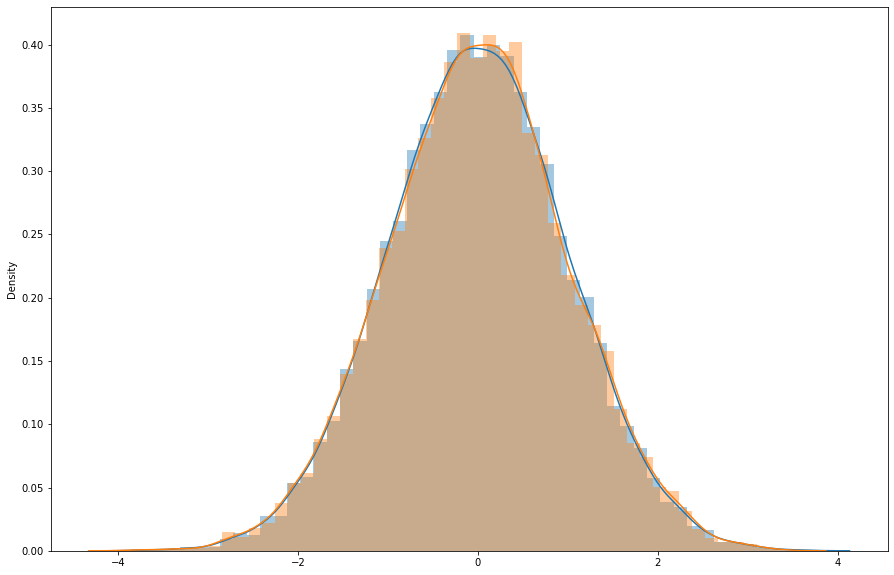

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.norm.ppf(x1), ax=ax)
sns.distplot(x[:, 0], ax=ax)

In [12]:
copula = GaussianMultivariate()
copula.fit(daily_returns_df)

marginal_cdfs = {}
for i, j in enumerate(daily_returns_df.columns):
    marginal = copula.univariates[i].cdf(daily_returns_df.iloc[:,i])
    marginal_cdfs[j] = marginal
marginal_cdfs_df = pd.DataFrame.from_dict(marginal_cdfs)
marginal_cdfs_df

C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\Users\jahan laptop\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


,SPY,TLT
0,0.949665,0.437893
1,0.597897,0.769506
2,0.488280,0.072723
3,0.678577,0.558770
4,0.634059,0.457917
...,...,...
3266,0.054494,0.469573
3267,0.745485,0.056746
3268,0.253263,0.019482
3269,0.069572,0.240218


In [14]:
copula.univariates[0].cdf(1)


0.9999982575229265

In [15]:
copula.covariance


,SPY,TLT
SPY,1.000000,-0.363046
TLT,-0.363046,1.000000


C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_13836/1348599300.py:26: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_13836/1348599300.py:28: MatplotlibDeprecationWarning: 
The is_last_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_col() instead.
  if ax.is_last_col():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_13836/1348599300.py:30: MatplotlibDeprecationWarning: 
The is_first_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_row() instead.
  if ax.is_first_row():
C:\Users\JAHANL~1\AppData\Local\Temp/ipykernel_13836/1348599300.py:32: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and

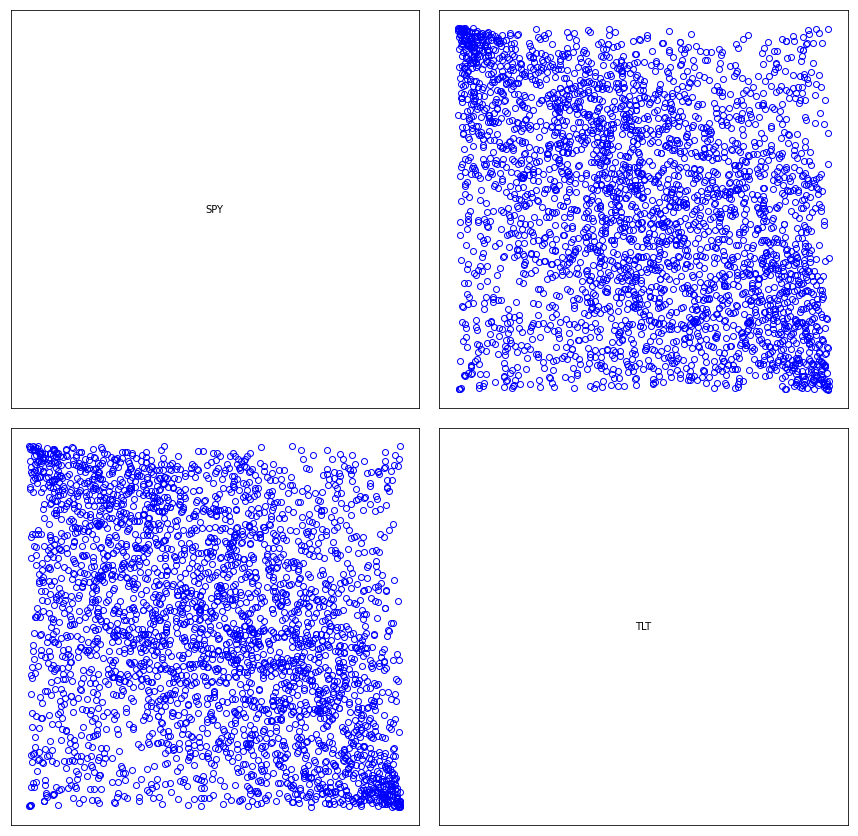

In [16]:
fig = scatterplot_matrix(marginal_cdfs_df, list(daily_returns_df.columns), linestyle='none', marker='o', color='blue', mfc='none')


<AxesSubplot:ylabel='SPY'>

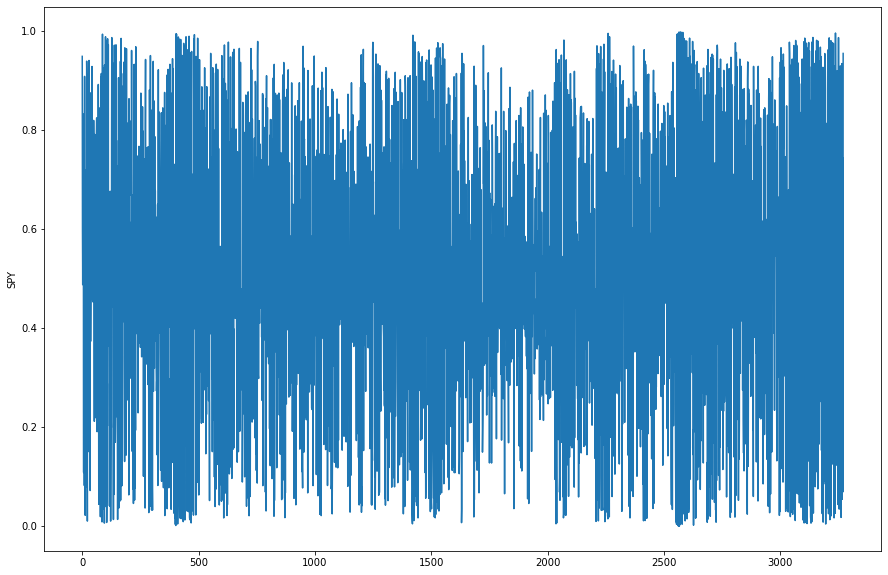

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=marginal_cdfs_df.iloc[:,0], ax=ax)

In [18]:
st.norm.ppf(marginal_cdfs_df.iloc[:,0])


array([ 1.64161185,  0.2479071 , -0.02938261, ..., -0.66425798,
       -1.47898603,  1.70137058])

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

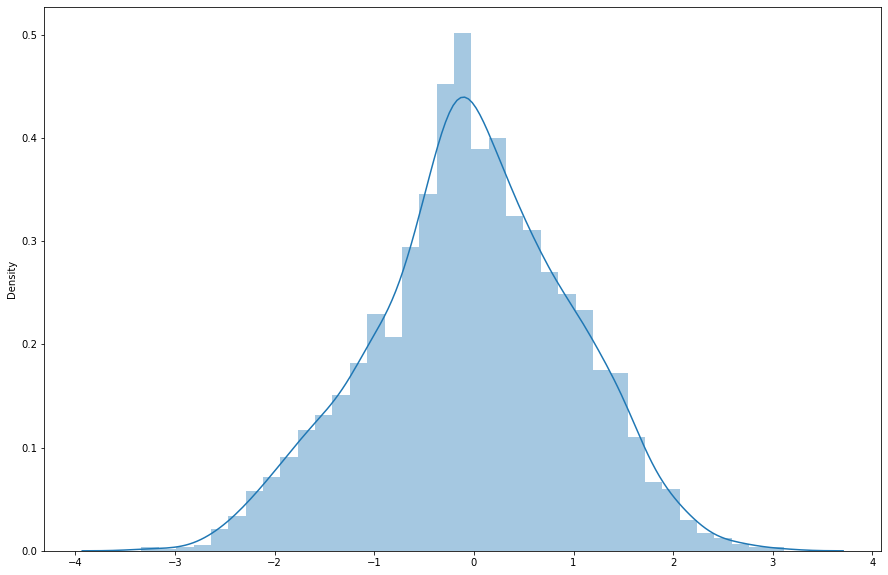

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(st.norm.ppf(marginal_cdfs_df.iloc[:,0]), ax=ax)

<AxesSubplot:>

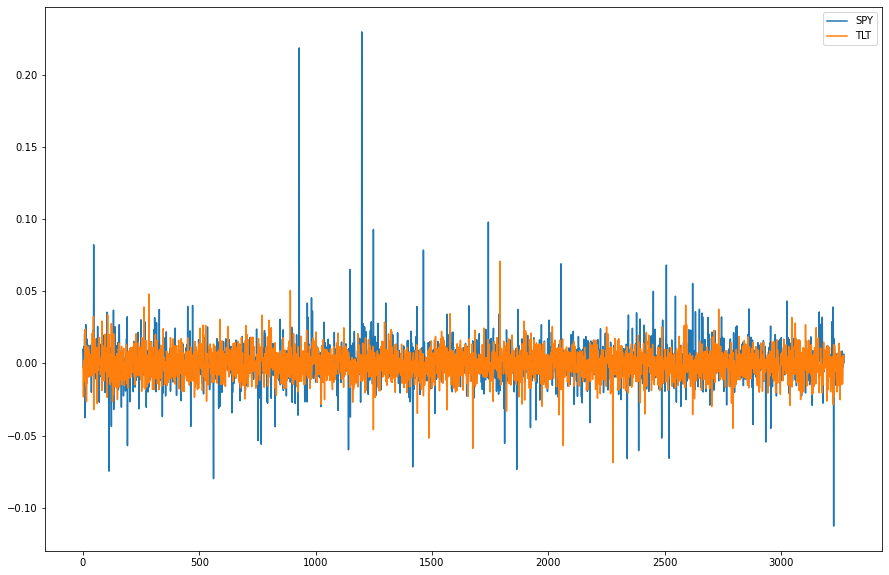

In [20]:
synthetic = copula.sample(len(marginal_cdfs_df))
synthetic.plot(figsize=(15,10))

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPY', ylabel='Density'>

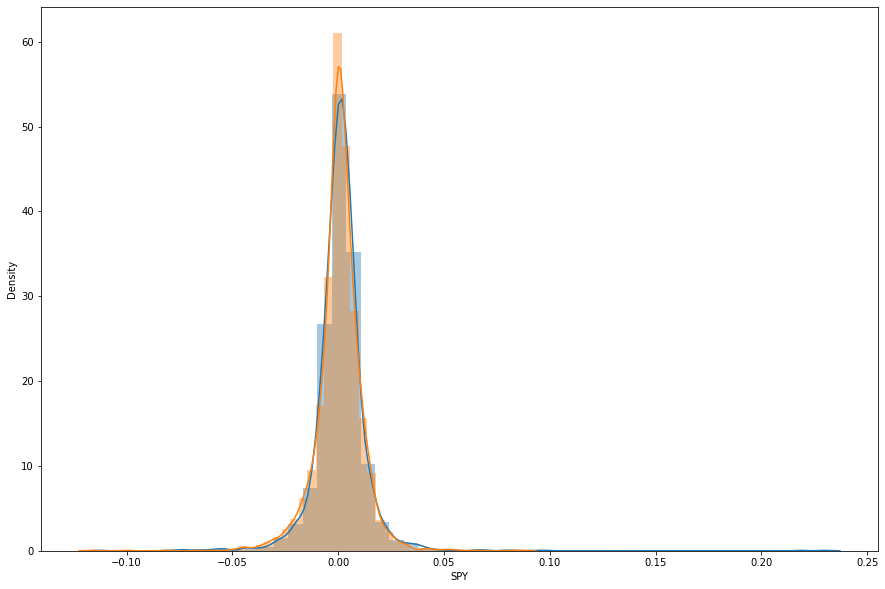

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,0], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 0], ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TLT', ylabel='Density'>

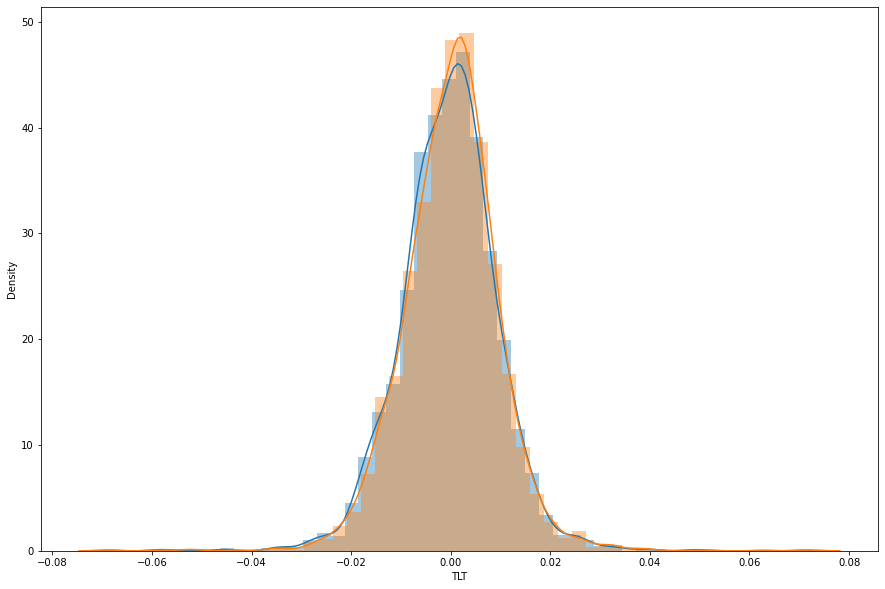

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,1], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 1], ax=ax)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TLT', ylabel='Density'>

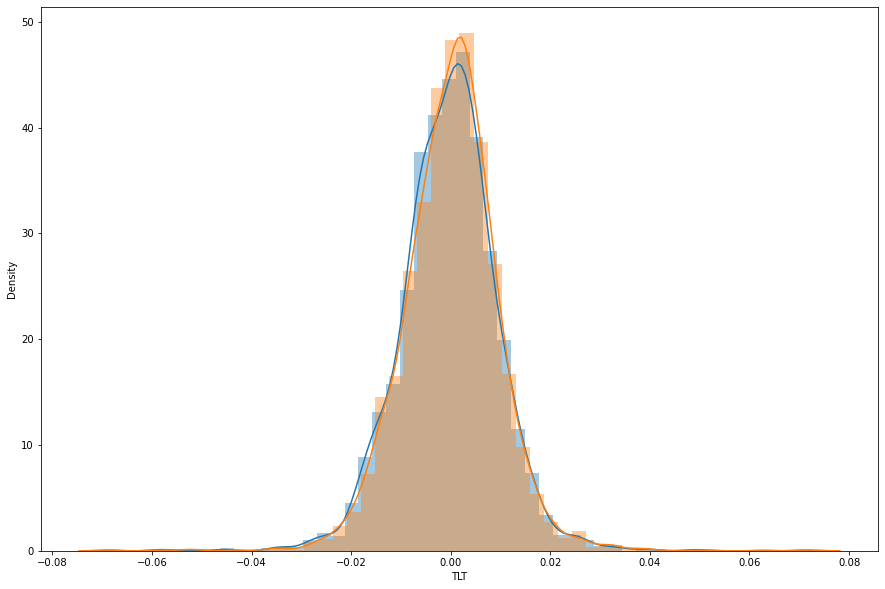

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(synthetic.iloc[:,1], ax=ax)
sns.distplot(daily_returns_df.iloc[:, 1], ax=ax)

In [26]:
copula_t.summary()


1.000000,-0.367645
-0.367645,1.000000


In [25]:
from copulae import StudentCopula

copula_t = StudentCopula(dim=len(daily_returns_df.columns))
copula_t.fit(data=daily_returns_df)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


               SPY          TLT
count  3271.000000  3271.000000
mean      0.500000     0.500000
std       0.288631     0.288631
min       0.000306     0.000306
25%       0.250153     0.250153
50%       0.500000     0.500000
75%       0.749847     0.749847
max       0.999694     0.999694


In [27]:
from copulae.stats import multivariate_t as mvt, t
copula_t_synthetic = mvt.rvs(cov=copula_t.sigma, df=copula_t._df, size=len(daily_returns_df))
copula_t_synthetic = pd.DataFrame(copula_t_synthetic)

C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jahan laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPY', ylabel='Density'>

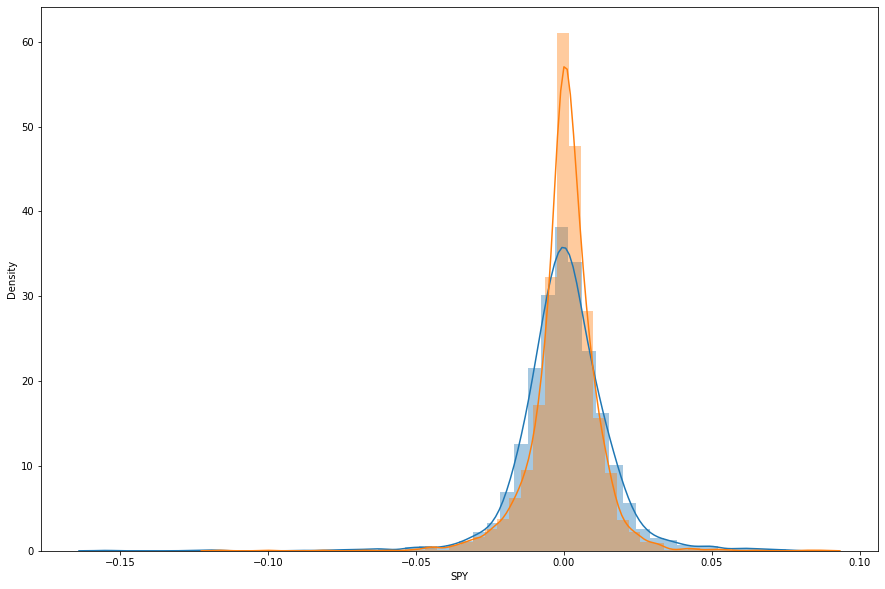

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(copula_t_synthetic.iloc[:,0] / 100, ax=ax)
sns.distplot(daily_returns_df.iloc[:,0], ax=ax)

In [29]:
copula_t_synthetic.columns = daily_returns_df.columns


In [30]:
weights = [1/len(synthetic.columns) for i in range(0, len(synthetic.columns))]
daily_portfolio_returns_df = daily_returns_df * weights
daily_portfolio_returns_df['portfolio_ret'] = daily_portfolio_returns_df.sum(axis=1)

In [31]:
portfolio_returns_df = synthetic * weights
portfolio_returns_df['portfolio_ret'] = portfolio_returns_df.sum(axis=1)

In [32]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.1)['portfolio_ret']
copula_portfolio_CVaR = np.mean(portfolio_returns_df['portfolio_ret'][portfolio_returns_df['portfolio_ret'] < - copula_portfolio_VaR])
print('Portfolio copula VaR', copula_portfolio_VaR * 100, 'CVaR', copula_portfolio_CVaR * 100)

Portfolio copula VaR -0.647261392232523 CVaR -0.09659232991956496


In [33]:
covariance = daily_returns_df.cov()
mean_vec = daily_returns_df.mean(axis=0)
norm_synthetic = pd.DataFrame(st.multivariate_normal.rvs(mean_vec, covariance, size=100))
portfolio_norm_returns_df = norm_synthetic * weights
portfolio_norm_returns_df['portfolio_ret'] = portfolio_norm_returns_df.sum(axis=1)

norm_portfolio_VaR = portfolio_norm_returns_df.quantile(0.1)['portfolio_ret']
norm_portfolio_CVaR = np.mean(portfolio_norm_returns_df['portfolio_ret'][portfolio_norm_returns_df['portfolio_ret'] < - norm_portfolio_VaR])
print('Portfolio normal VaR', norm_portfolio_VaR * 100, 'CVaR', norm_portfolio_CVaR * 100)

Portfolio normal VaR -0.7693927381169542 CVaR -0.1299513048086706


In [34]:
portfolio_t_returns_df = copula_t_synthetic * weights
portfolio_t_returns_df['portfolio_ret'] = portfolio_t_returns_df.sum(axis=1)

In [35]:
portfolio_t_returns_df.head()


,SPY,TLT,portfolio_ret
0,0.375942,-0.668181,-0.292239
1,-0.235540,0.729181,0.493642
2,0.457057,-1.257727,-0.800670
3,-0.114025,0.002665,-0.111360
4,2.346701,-1.410538,0.936162


<AxesSubplot:>

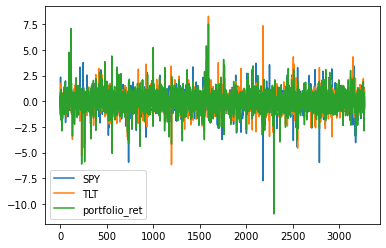

In [36]:
portfolio_t_returns_df.plot()

In [37]:
copula_t_portfolio_VaR = portfolio_t_returns_df.quantile(0.1)['portfolio_ret']
copula_t_portfolio_CVaR = np.mean(portfolio_t_returns_df['portfolio_ret'][portfolio_t_returns_df['portfolio_ret'] < - copula_t_portfolio_VaR])
print('Portfolio copula t VaR', copula_t_portfolio_VaR, 'CVaR', copula_t_portfolio_CVaR)

Portfolio copula t VaR -0.9047756941367544 CVaR -0.16733903360002378


Text(0.5, 1.0, 't-Student Copula Samples')

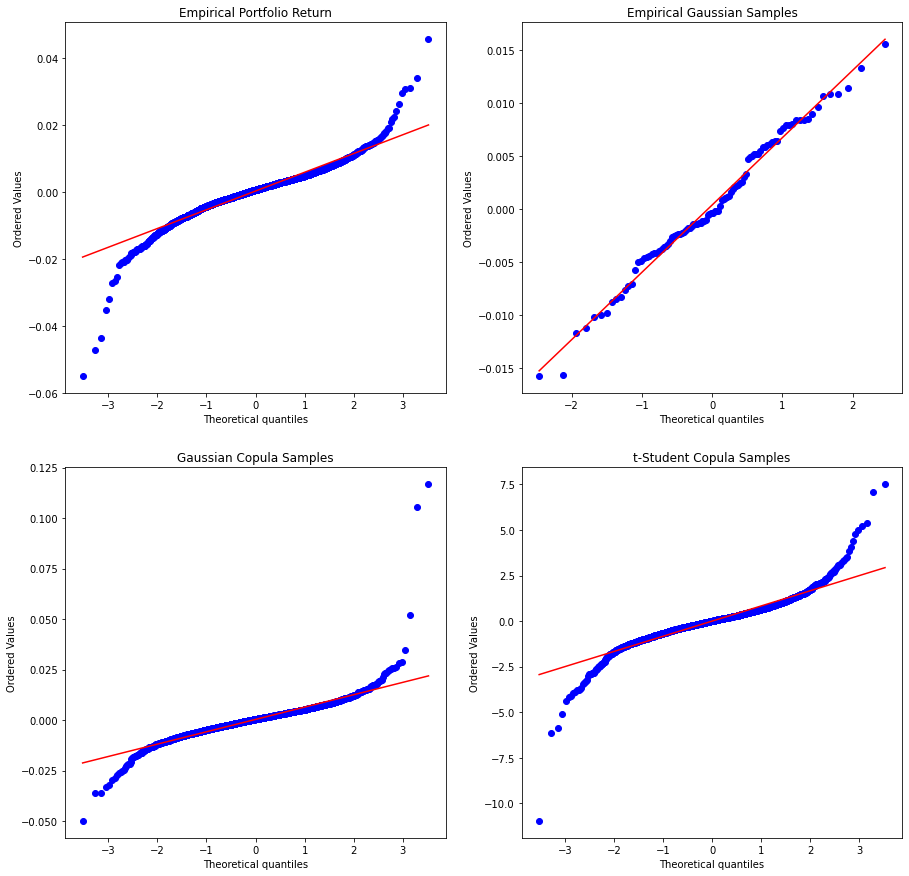

In [38]:
nsample = 100
fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot(221)
x = daily_portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax1.set_title('Empirical Portfolio Return')

ax2 = plt.subplot(222)
x = portfolio_norm_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax2.set_title('Empirical Gaussian Samples')

ax3 = plt.subplot(223)
x = portfolio_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax3.set_title('Gaussian Copula Samples')

ax4 = plt.subplot(224)
x = portfolio_t_returns_df['portfolio_ret']
res = st.probplot(x, plot=plt)
ax4.set_title('t-Student Copula Samples')

In [39]:
portfolio_t_returns_df.describe()


,SPY,TLT,portfolio_ret
count,3271.000000,3271.000000,3271.000000
mean,0.018732,-0.020405,-0.001673
std,0.757739,0.785266,0.881841
min,-7.741707,-6.172207,-10.969712
25%,-0.353855,-0.395212,-0.413155
50%,0.009366,-0.011579,0.005514
75%,0.405194,0.370407,0.417517
max,3.757645,8.274613,7.522858


<AxesSubplot:>

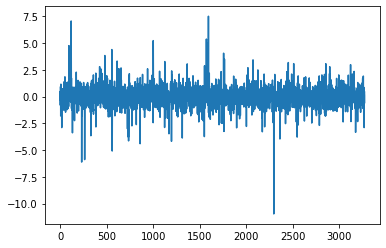

In [40]:
portfolio_t_returns_df['portfolio_ret'].plot()


In [41]:
portfolio_t_returns_df['portfolio_ret'].describe()


count    3271.000000
mean       -0.001673
std         0.881841
min       -10.969712
25%        -0.413155
50%         0.005514
75%         0.417517
max         7.522858
Name: portfolio_ret, dtype: float64

In [42]:
portfolio_t_returns_df['portfolio_ret'].skew()


-0.38951853398008324

In [43]:
portfolio_t_returns_df['portfolio_ret'].kurtosis()


14.931452238714762

In [44]:
from copulae import GumbelCopula

copula_Gumbel = GumbelCopula(dim=len(daily_returns_df.columns))
copula_Gumbel.fit(data=daily_returns_df)

               SPY          TLT
count  3271.000000  3271.000000
mean      0.500000     0.500000
std       0.288631     0.288631
min       0.000306     0.000306
25%       0.250153     0.250153
50%       0.500000     0.500000
75%       0.749847     0.749847
max       0.999694     0.999694


C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\archimedean\gumbel.py:166: UserWarning: For the Gumbel copula, tau must be >= 0. Replacing negative values by 0.
  warnings.warn(warning_message)


In [45]:
copula_Gumbel.summary()


Gumbel Copula Summary
================================================================================
Gumbel Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : 1.0

In [46]:
from copulae import FrankCopula

copula_f = FrankCopula(dim=len(daily_returns_df.columns))
copula_f.fit(data=daily_returns_df)

               SPY          TLT
count  3271.000000  3271.000000
mean      0.500000     0.500000
std       0.288631     0.288631
min       0.000306     0.000306
25%       0.250153     0.250153
50%       0.500000     0.500000
75%       0.749847     0.749847
max       0.999694     0.999694


In [47]:
copula_f.summary()

Frank Copula Summary
================================================================================
Frank Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : -2.277719433965167

In [48]:
from copulae import ClaytonCopula

copula_cl = ClaytonCopula(dim=len(daily_returns_df.columns))
copula_cl.fit(data=daily_returns_df)

               SPY          TLT
count  3271.000000  3271.000000
mean      0.500000     0.500000
std       0.288631     0.288631
min       0.000306     0.000306
25%       0.250153     0.250153
50%       0.500000     0.500000
75%       0.749847     0.749847
max       0.999694     0.999694


In [49]:
copula_cl.summary()

Clayton Copula Summary
================================================================================
Clayton Copula with 2 dimensions


Parameters
--------------------------------------------------------------------------------
       theta        : -0.08148745098227225

In [52]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.5)['portfolio_ret']


In [53]:
copula_portfolio_VaR

0.0004969962724029875

In [54]:
copula_portfolio_VaR = portfolio_returns_df.quantile(0.3)['portfolio_ret']


In [55]:
copula_portfolio_VaR

-0.0022621831417992

In [56]:
from copulae.stats import multivariate_g as mvg, gumbel
copula_t_synthetic = mvg.rvs(cov=copula_g.sigma, df=copula_g._df, size=len(daily_returns_df))
copula_t_synthetic = pd.DataFrame(copula_g_synthetic)

ImportError: cannot import name 'multivariate_g' from 'copulae.stats' (C:\Users\jahan laptop\anaconda3\lib\site-packages\copulae\stats\__init__.py)

In [57]:
copula_t_synthetic.columns = daily_returns_df.columns


In [58]:
copula_t_synthetic

,SPY,TLT
0,0.751885,-1.336362
1,-0.471079,1.458363
2,0.914114,-2.515453
3,-0.228049,0.005330
4,4.693401,-2.821077
...,...,...
3266,-0.789928,-4.999695
3267,0.624807,-0.230431
3268,2.092106,-1.744754
3269,-1.082756,-0.152690


In [61]:
copula_t_synthetic.columns

Index(['SPY', 'TLT'], dtype='object')